In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

- Se sacan las medias de todas las columnas

- Se remplazan los valores nulos dentro del df 'medias' por la media de su columna, para que así los datos puedan distribuirse como una normal y seguir trabajando 

In [5]:
medias = df.mean() 
df2 = df.fillna(medias)

In [6]:
df2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### 1) Entrena por lo menos 2 algoritmos de clasificación

### -Selección de los datos para 2D

In [7]:
df3=df2.iloc[:,:]
df3.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>],
       [<AxesSubplot:title={'center':'Potability'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

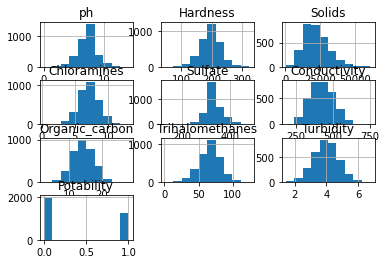

In [8]:
df3.hist()

### -Normalización de los datos

In [9]:
scaler = MinMaxScaler()

In [10]:
scale =scaler.fit_transform(df3)

In [11]:
df_scale = pd.DataFrame(scale, columns = df3.columns)
df_scale 

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.505771,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.581699,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.581699,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
...,...,...,...,...,...,...,...,...,...,...
3271,0.333436,0.530482,0.775947,0.533436,0.656047,0.603192,0.448062,0.535037,0.564534,1.0
3272,0.557775,0.530016,0.279263,0.603473,0.581699,0.368912,0.678284,0.532673,0.254915,1.0
3273,0.672822,0.465486,0.539101,0.547807,0.581699,0.438152,0.338662,0.560655,0.349570,1.0
3274,0.366197,0.664407,0.191490,0.465860,0.581699,0.387157,0.343638,0.622659,0.616120,1.0


In [12]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [13]:
pca = PCA()
pca.fit(preprocessing.scale(df3))

PCA()

In [14]:
pca.fit(df_scale)

PCA()

In [15]:
pca = PCA(n_components=2)
pca.fit(preprocessing.scale(df_scale))

PCA(n_components=2)

In [16]:
pca.explained_variance_

array([1.2062978 , 1.14018056])

In [17]:
pca.explained_variance_ratio_

array([0.12059296, 0.11398325])

In [18]:
components = np.arange(pca.n_components_) + 1
variance = pca.explained_variance_ratio_

In [19]:
pca_components_df = pd.DataFrame(pca.components_.transpose(),
                                columns=components,
                                index=df3.columns)

In [20]:
pca_components_df

,1,2
ph,-0.329565,-0.513798
Hardness,-0.017509,-0.610605
Solids,0.663872,0.006282
Chloramines,-0.214227,0.362433
Sulfate,-0.571704,0.333483
Conductivity,0.064029,-0.076287
Organic_carbon,-0.133857,-0.217081
Trihalomethanes,0.018607,0.019034
Turbidity,0.165820,0.217738
Potability,0.166599,0.140890


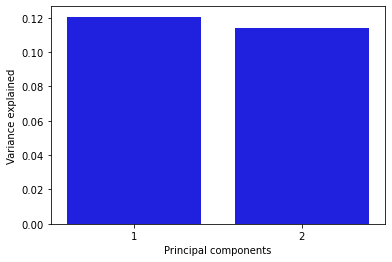

In [21]:
sns.barplot(x=components, y=variance, color="b")
plt.xlabel("Principal components")
plt.ylabel("Variance explained")
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Potability'>

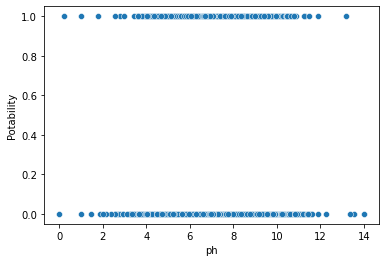

In [22]:
sns.scatterplot(x='ph', y= 'Potability',data=df3)

Se obtienen los nombres de las columnas del 'df2' ya que se van a trabajar con los datos con una distribución normal 

In [23]:
df3.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [24]:
df4=df3.iloc[:, [8,9]]
df4.head()

,Turbidity,Potability
0,2.963135,0
1,4.500656,0
2,3.055934,0
3,4.628771,0
4,4.075075,0


In [25]:
km = KMeans(n_clusters=2)

In [26]:
km = KMeans(n_clusters=2)
km.fit_predict(df4)

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

In [27]:
km.cluster_centers_

array([[3.3601691 , 0.39537641],
       [4.61081575, 0.38451857]])

In [28]:
df4["Clusters"] = km.labels_

/var/folders/_l/j4lbn44x0_gcl8w72t3zkhdh0000gn/T/ipykernel_4949/881864093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Clusters"] = km.labels_


In [29]:
df2.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

<AxesSubplot:xlabel='Turbidity', ylabel='Potability'>

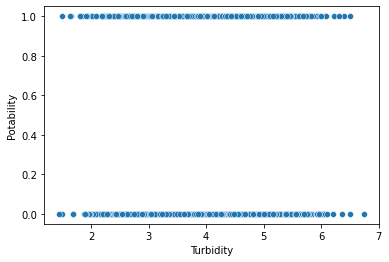

In [30]:
sns.scatterplot(x='Turbidity', y= 'Potability',data=df4, palette="viridis")

In [31]:
K =range (2,10)
inertias =[]
for i in K:
  kmeans =KMeans(n_clusters=i)
  kmeans.fit(df4)
  inertias. append(kmeans.inertia_)

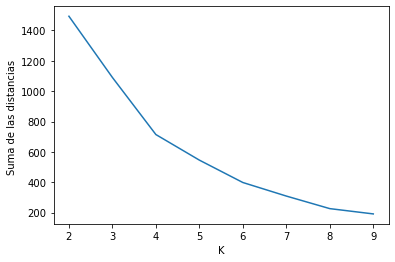

In [32]:
plt.plot(K, inertias)
plt.xlabel ("K")
plt.ylabel("Suma de las distancias ")
plt.show()

In [33]:
km = KMeans(n_clusters=3)

In [34]:
km.fit_predict(df4)

array([2, 1, 2, ..., 0, 1, 0], dtype=int32)

In [35]:
km.cluster_centers_

array([[ 3.37163162e+00,  1.00000000e+00,  0.00000000e+00],
       [ 4.61042096e+00,  3.84276730e-01,  1.00000000e+00],
       [ 3.35205483e+00, -1.11022302e-16,  1.11022302e-16]])

In [36]:
df4["Clusters"] = km.labels_

/var/folders/_l/j4lbn44x0_gcl8w72t3zkhdh0000gn/T/ipykernel_4949/881864093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["Clusters"] = km.labels_


In [37]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [38]:
linkage_data = linkage(df2, method='centroid', metric='euclidean')

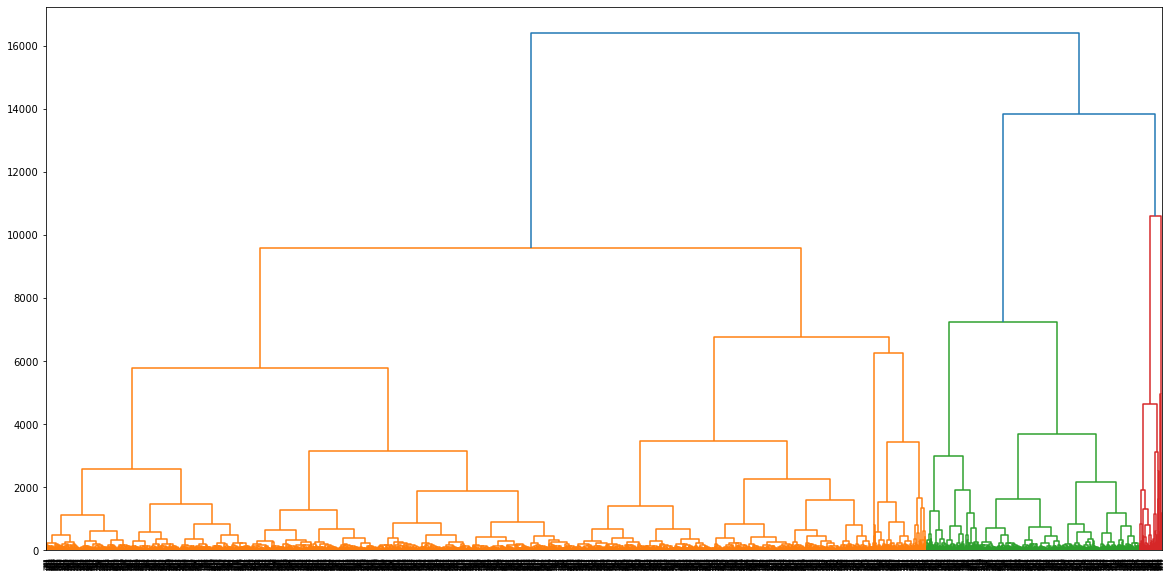

In [39]:
plt.figure(figsize=(20,10))
dendrogram(linkage_data)
plt.show()

### -Se crean variab les dependientes e independientes

In [40]:
columnas = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
            'Conductivity','Organic_carbon', 'Trihalomethanes', 
            'Turbidity']

X = df2[columnas] # Se crean las variables predictoras
y = df2.Potability #Se crea la variable dependiente

### -División de los datos en entrenamiento y prueba

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn import svm

In [ ]:
predict = model_tree.predict(p_test)

### -Clasificador

### 2) Realiza 3 calibraciones para cada uno y justifica cual es el que da el mejor resultado

### 3) Realiza las visualizaciones correspondientes de cada clasificador

## 4)Evalúa los modelos de clasificación:

### 4.1) Calcula la exactitud (accuracy), la sensibilidad (recall), la especificidad (precision) y el valor F1 de tu modelo

### 4.2) Realiza la matriz de confusión de tu modelo

### 4.3) Genera la curva ROC y calcula la AUC para tu modelo

### 4.4) Realiza la validación cruzada con k-fold, calcula accuracy y f1-score y comenta los resultados obtenidos

### 5) Selecciona el mejor clasificador, justifica la elección y concluye sobre los mejores y peores resultados